In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(city_data, ride_data, how="left", on="city")

# Display the data table for preview
data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [144]:
colormap = {"Rural":"gold", "Suburban":"lightskyblue","Urban":"lightcoral"}

## Bubble Plot of Ride Sharing Data

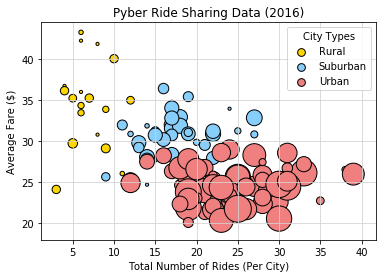

In [171]:
city_group_data = ride_data.groupby("city")

# Obtain the x and y coordinates for each of the three city types
avg_fare = city_group_data['fare'].mean()
rides_per_city = city_group_data['fare'].count()
fare_ride_data = pd.DataFrame({"avg_fare":avg_fare, "rides_per_city": rides_per_city})
city_fare_data = pd.merge(fare_ride_data, city_data, how = "left", on="city")

# Build the scatter plots for each city types
# Incorporate a text label regarding circle size in the scatter using label
for key in colormap:
    fare_data = city_fare_data.loc[city_fare_data["type"] == key]
    rides = fare_data["rides_per_city"]
    fares = fare_data["avg_fare"]
    drivers = fare_data["driver_count"]
    plt.scatter(rides, fares, marker="o", facecolors=colormap[key], edgecolors="black", s=(drivers*10),\
                    alpha=1.0, label=key)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(color="lightgray")

# Create a legend
lgnd = plt.legend(title="City Types", fontsize="medium", markerscale=.8)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

# Save Figure
plt.savefig("ride_share_bubble.png")
plt.show()
    

## Total Fares by City Type

In [116]:
# Calculate Type Percents
fare_sum = data_complete.groupby('type')["fare"].sum()
fare_total = data_complete["fare"].sum()
#print (fare_sum)
#print (fare_total)

percent_fares = fare_sum / fare_total * 100
#print (percent_fares)

fare_types_df = pd.DataFrame({"fare_sum":fare_sum, "% of Total Fares by City Type": percent_fares})
fare_types_df = fare_types_df.reset_index()
#fare_types_df

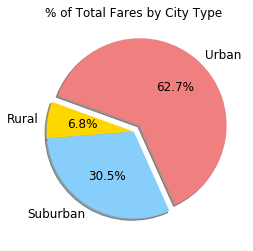

In [117]:
# Build Pie Chart
explode = [0,0,0.1]
ax = fare_types_df.plot(kind='pie', y = '% of Total Fares by City Type', autopct='%1.1f%%', startangle=160, shadow=True,\
                       labels=fare_types_df['type'], colors=list(colormap.values()),\
                       legend = False, fontsize=12, explode=explode)

ax.set_ylabel('')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fare_city_type.png")
plt.show()

## Total Rides by City Type

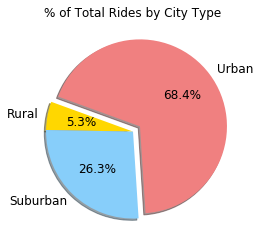

In [130]:
# Calculate Ride Percents
ride_count = data_complete.groupby('type')["ride_id"].count()
ride_total = data_complete["ride_id"].count()
#print (ride_sum)
#print (ride_total)

percent_rides = ride_count / ride_total * 100
#print (percent_rides)

ride_types_df = pd.DataFrame({"ride_count":ride_count, "percent_rides": percent_rides})
ride_types_df = ride_types_df.reset_index()
ride_types_df

# Build Pie Chart
explode = [0,0,0.1]
ax = ride_types_df.plot(kind='pie', y = "percent_rides", autopct='%1.1f%%', startangle=160, shadow=True,\
                       labels=ride_types_df['type'], colors=list(colormap.values()),\
                       legend = False, fontsize=12, explode=explode)

ax.set_ylabel('')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("rides_by_city.png")
plt.show()

## Total Drivers by City Type

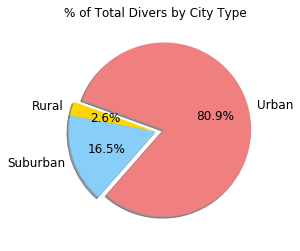

In [142]:
# Calculate Driver Percents
driver_count = city_data.groupby('type')["driver_count"].sum()
driver_total = city_data["driver_count"].sum()
#print (driver_count)
#print (driver_total)

percent_drivers = driver_count / driver_total * 100
#print (percent_drivers)

driver_types_df = pd.DataFrame({"driver_count":driver_count, "percent_drivers": percent_drivers})
driver_types_df = driver_types_df.reset_index()
driver_types_df

# Build Pie Charts
explode = [0,0,0.1]
ax = driver_types_df.plot(kind='pie', y = "percent_drivers", autopct='%1.1f%%', startangle=160, shadow=True,\
                       labels=driver_types_df['type'], colors=list(colormap.values()),\
                       legend = False, fontsize=12, explode=explode)

ax.set_ylabel('')
plt.title("% of Total Divers by City Type")

# Save Figure
plt.savefig("drivers_by_city.png")
plt.show()



## Observations

1) Fare Prices increase as you go from Urban to Rural areas
2) Most drivers work the Urban routes with very few drivers working the Rural routes
3) People living in Urban areas are much more likely to use Pyber than in either suburban or Rural areas.